<h1 style="text-align: center;">Bike Sharing</h1>
<h3 style="text-align: center;">Elia Samuel</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

Bike-sharing systems are a new generation of traditional bike rentals where the whole process, 
from membership, rental, and return back, has become automatic. Through these systems, a user 
can easily rent a bike from a particular position and return back at another position. Currently, 
there are about over 500 bike-sharing programs around the world which is composed of over 500 
thousand bicycles. Today, great interest exists in these systems due to their important role in 
traffic, environmental, and health issues.

Apart from interesting real-world applications of bike-sharing systems, the characteristics of data 
generated by these systems make them attractive for research. Unlike other transport services 
such as buses or subways, the duration of travel, departure, and arrival position is explicitly 
recorded in these systems. This feature turns the bike-sharing system into a virtual sensor 
network that can be used for sensing mobility in the city. Hence, it is expected that the most 
important events in the city could be detected by monitoring these data. 

**1.2 Problem Statements**

One of the biggest challenges for bike-sharing companies is ensuring the optimal availability of bikes at each station to meet customer demand efficiently. The demand for bike rentals fluctuates significantly due to factors such as time, weather conditions, and urban mobility patterns.  

Given that bike-sharing systems must ensure bikes are available at the right locations and times, it is essential to have a reliable demand forecasting system.  

**With the growing number of customers and an expanding network of bike stations, predicting the number of bike rentals at any given time is crucial.** This prediction can help the company optimize bike distribution, reduce operational costs, and _improve customer satisfaction_ by ensuring the availability of bikes when and where they are needed.

**1.3 Goals**

Based on the stated problem, a bike-sharing company requires a tool that can **accurately predict the number of bike rentals at specific times and locations**. This predictive tool should leverage various features, such as time (hour, day, season), weather conditions (temperature, humidity, weather situation), and holiday schedules, to enhance the accuracy of rental demand forecasts. By doing so, the company can ensure an efficient allocation of bikes to meet customer needs.

For the company, a reliable demand prediction tool would not only optimize bike distribution and reduce operational costs but also significantly improve customer satisfaction. By ensuring that bikes are always available when and where they are needed, the company can enhance customer loyalty, increase rental volumes, and, consequently, boost overall revenue.

**1.4 Analytical Approach**

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

_**Machine Learning Evaluation Metric**_

The evaluation metrics to be used are **RMSE**, **MAE**, **MAPE**, and **R-squared**, with detailed descriptions as follows:  

1. **Root Mean Squared Error (RMSE)**  
   - **Definition**: RMSE represents the square root of the mean of the squared errors between the actual and predicted values.  
   - **Purpose**: RMSE penalizes larger errors more heavily, making it particularly useful when minimizing significant deviations is a priority.  
   - **Interpretation**: A lower RMSE indicates that the model has a better predictive accuracy.  

2. **Mean Absolute Error (MAE)**  
   - **Definition**: MAE measures the average magnitude of errors in predictions, taking the absolute difference between actual and predicted values.  
   - **Purpose**: MAE provides a straightforward measure of prediction accuracy without over-penalizing outliers.  
   - **Interpretation**: A lower MAE signifies that the model predictions are closer to the actual values.  

3. **Mean Absolute Percentage Error (MAPE)**  
   - **Definition**: MAPE calculates the average percentage difference between actual and predicted values.  
   - **Purpose**: MAPE is useful for interpreting errors in terms of percentage, making it easy to communicate results to stakeholders.  
   - **Interpretation**: A lower MAPE indicates better model performance, especially when evaluating relative prediction errors.  

4. **R-squared (R²)**  
   - **Definition**: R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variables.  
   - **Purpose**: R² evaluates how well the model explains the observed data variance.  
   - **Interpretation**: An R² value closer to 1 indicates that the model fits the data well. However, R² is primarily valid for linear regression models and may not be suitable for non-linear models.

**1.6 Success Criteria**

**Evaluation Criteria**  
The following criteria will be used to assess model performance:  
- **Lower RMSE, MAE, and MAPE** values indicate better prediction accuracy in terms of absolute and relative errors.  
- **R-squared** will be used to evaluate the model's goodness-of-fit, provided the final model is linear. For non-linear models, alternative metrics will be prioritized.  

## **Section 2. Data Understanding**

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv(r'D:\Data Science\Capstone Project\Capstone Project 3\bike_sharing\data\raw\data_bike_sharing.csv')

**2.1 General Information**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


**2.2 Feature Information**

| Feature | Description | Impact to Business |
|---------| ----------- | ------------------ |
| dteday | date | Listing ID |
| season | season (1: winter, 2: spring, 3: summer, 4: fall)  | Name of the listing |
| hr | hour (0 to 23) | Host ID |
| holiday | holiday or not  | Name of the host |
| temp |  normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8,t_max+39 (only in hourly scale)  | Location |
| atemp | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin),tmin=-16, t_max=+50 (only in hourly scale)  | Area |
| hum | normalized humidity. The values are divided into 100 (max)  | Latitude coordinates |
| casual |  count of casual users | Longitude coordinates |
| registered | count of registered users | Listing space type |
| cnt | count of total rental bikes including both casual and registered  | Price in dollars |
| weathersit | 1: [Clear, Few clouds, Partly cloudy, Partly cloudy], 2: [Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist], 3: [Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds], 4: [Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog]| Amount of nights minimum |

In [51]:
data.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt'],
      dtype='object')

**2.3 Statistics Summary**

In [52]:
data.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


In [53]:
data.describe(include='object')

,dteday
count,12165
unique,731
top,2012-03-02
freq,22


## **Section 3. Data Cleaning**

**3.0 Generate New Feature**

**3.1 Missing Values**

In [54]:
print('Total Missing Value:',data.isnull().sum().sum())

Total Missing Value: 0


**3.2 Duplicated Values**

In [55]:
print('Total Data Duplicate:', data.duplicated().sum())

Total Data Duplicate: 0


**3.3 Identify Spelling Errors**

In [56]:
num_feature = data.drop(columns='dteday',axis=1)

for col in num_feature.columns:
    print(f'Total Unique valuse in {col}: {num_feature[col].nunique()}')
    print(num_feature[col].value_counts())
    print()

Total Unique valuse in hum: 89
hum
0.88    450
0.83    439
0.94    383
0.87    329
0.70    302
       ... 
0.97      1
0.13      1
0.91      1
0.12      1
0.14      1
Name: count, Length: 89, dtype: int64

Total Unique valuse in weathersit: 4
weathersit
1    8071
2    3119
3     972
4       3
Name: count, dtype: int64

Total Unique valuse in holiday: 2
holiday
0    11803
1      362
Name: count, dtype: int64

Total Unique valuse in season: 4
season
3    3169
2    3074
1    3023
4    2899
Name: count, dtype: int64

Total Unique valuse in atemp: 65
atemp
0.6212    700
0.5152    447
0.6061    434
0.6667    427
0.4091    424
         ... 
0.9091      3
0.9545      1
0.0000      1
1.0000      1
0.9848      1
Name: count, Length: 65, dtype: int64

Total Unique valuse in temp: 50
temp
0.70    507
0.60    492
0.62    491
0.66    485
0.64    476
0.34    463
0.30    445
0.36    437
0.32    428
0.40    424
0.54    414
0.46    409
0.72    404
0.26    391
0.56    391
0.52    388
0.42    373
0.50    

**3.4 Identify Anomaly Values**

In [57]:
data.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt'],
      dtype='object')

In [58]:
cat_feature = data.drop(columns=['casual', 'registered', 'cnt'],axis=1)
num_feature = data.drop(columns=cat_feature.columns, axis=1)

- Check Distribution (Numerical Variable)

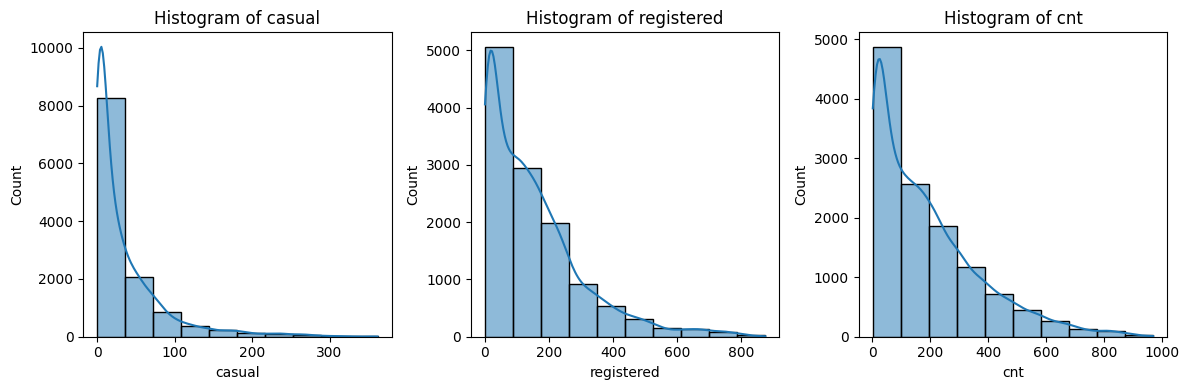

In [59]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Iterate over columns and plot histograms
for i, col in enumerate(num_feature.columns):
    sns.histplot(num_feature[col], ax=axes[i],bins=10,kde=True)
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

- Check Cardinality (Categorical Variable)

In [60]:
for col in cat_feature.columns:
    print(f'Total Unique valuse in {col}: {cat_feature[col].nunique()}')
    print(cat_feature[col].value_counts())
    print()

Total Unique valuse in dteday: 731
dteday
2012-03-02    22
2011-08-17    22
2012-07-08    22
2012-07-07    22
2011-08-09    22
              ..
2012-12-01     9
2012-10-30     8
2011-01-27     7
2011-01-18     6
2012-10-29     1
Name: count, Length: 731, dtype: int64

Total Unique valuse in hum: 89
hum
0.88    450
0.83    439
0.94    383
0.87    329
0.70    302
       ... 
0.97      1
0.13      1
0.91      1
0.12      1
0.14      1
Name: count, Length: 89, dtype: int64

Total Unique valuse in weathersit: 4
weathersit
1    8071
2    3119
3     972
4       3
Name: count, dtype: int64

Total Unique valuse in holiday: 2
holiday
0    11803
1      362
Name: count, dtype: int64

Total Unique valuse in season: 4
season
3    3169
2    3074
1    3023
4    2899
Name: count, dtype: int64

Total Unique valuse in atemp: 65
atemp
0.6212    700
0.5152    447
0.6061    434
0.6667    427
0.4091    424
         ... 
0.9091      3
0.9545      1
0.0000      1
1.0000      1
0.9848      1
Name: count, Length

- Change Column Labels

In [61]:
data = data.rename({'dteday':'date_day','hum':'humidity','weathersit':'weather','hr':'hour','cnt':'count'}, axis=1)

In [62]:
data['date_day'] = pd.to_datetime(data['date_day'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_day    12165 non-null  datetime64[ns]
 1   humidity    12165 non-null  float64       
 2   weather     12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hour        12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  count       12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


In [64]:
data_pre = data.copy()

In [65]:
data_pre['year'] = data_pre['date_day'].dt.year
data_pre['month'] = data_pre['date_day'].dt.month
data_pre['day'] = data_pre['date_day'].dt.day
data_pre['weekday'] = data_pre['date_day'].dt.weekday

In [66]:
data_pre = data_pre.drop('date_day',axis=1)

In [67]:
data_pre

,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,year,month,day,weekday
0,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,9,4
1,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,17,6
2,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,15,2
3,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,31,5
4,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,14,243,257,2012,1,25,2
12161,0.62,1,0,3,0.7424,0.78,0,39,63,102,2012,7,6,4
12162,0.60,2,1,1,0.2121,0.24,5,0,6,6,2012,2,20,0
12163,0.77,2,0,2,0.4242,0.42,2,14,55,69,2012,3,31,5


## **Section 4. Data Generation**

In [68]:
from sklearn.model_selection import train_test_split

**4.1 Constructing `Seen` and `Unseen` Data**

In [69]:
seen_data, unseen_data = train_test_split(data, test_size=0.2, random_state=42)

print(seen_data.shape)
print(unseen_data.shape)

(9732, 11)
(2433, 11)


**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [70]:
training_data, testing_data = train_test_split(seen_data, test_size=0.3,
                                                    random_state=42)

print(training_data.shape)
print(testing_data.shape)

(6812, 11)
(2920, 11)


## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Analysis 1**

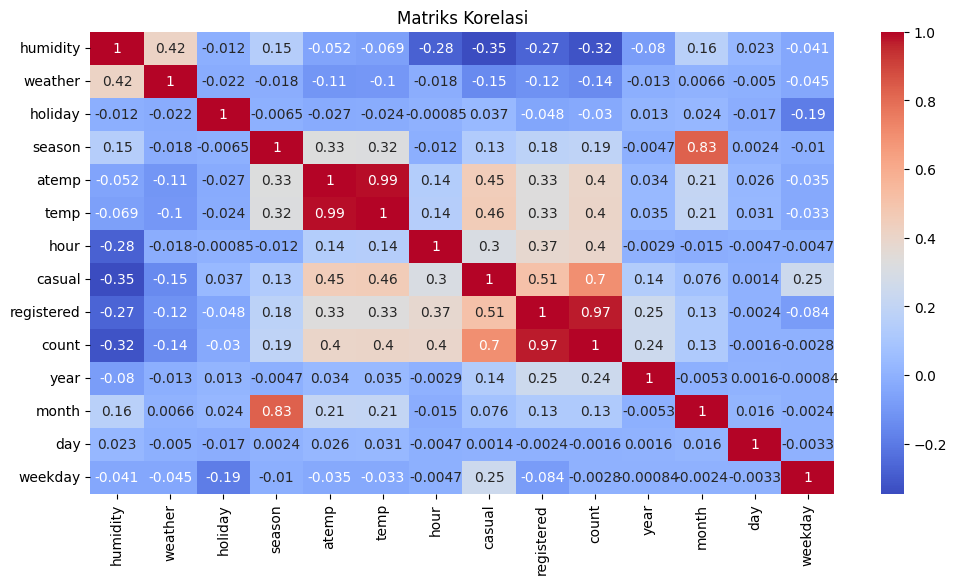

In [71]:
plt.figure(figsize=(12,6))
corr_matrix = data_pre.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

**5.2 Analysis 2**

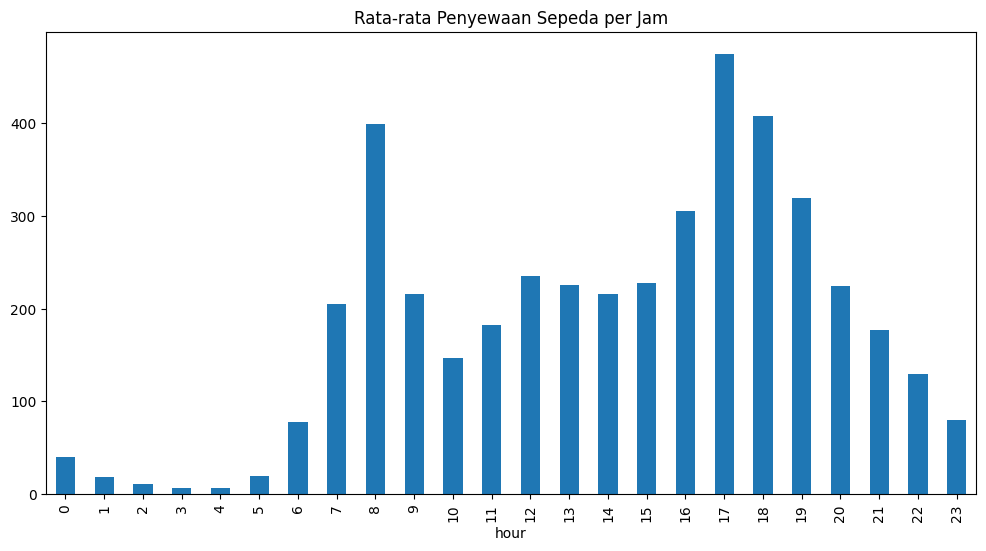

In [72]:
# Penyewaan berdasarkan jam
data.groupby('hour')['count'].median().plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.show()


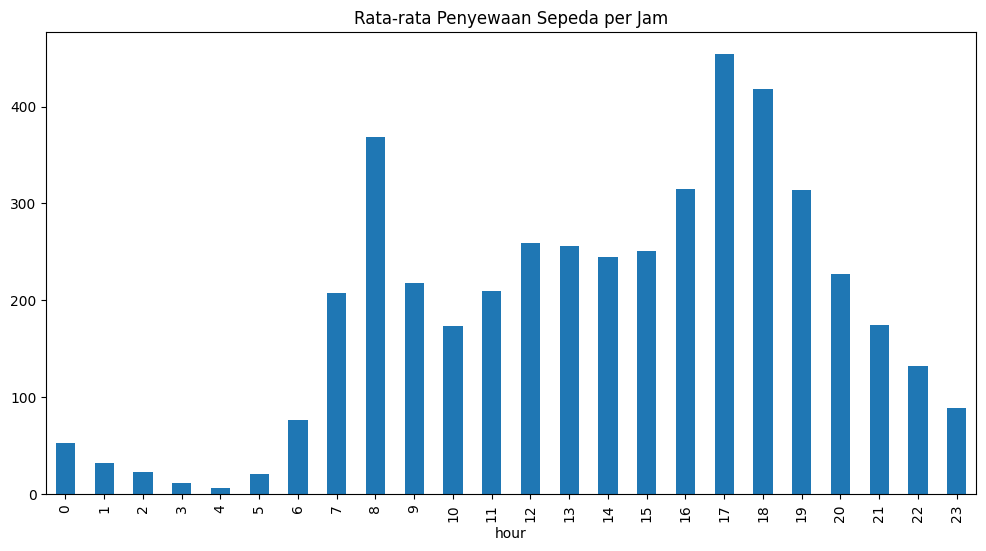

In [73]:
# Penyewaan berdasarkan jam
data.groupby('hour')['count'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.show()


## **Section 6. Data Preparation**

**6.0 Experiment**

- Feature Engineering

In [74]:
data_pre.head()

,humidity,weather,holiday,season,atemp,temp,hour,casual,registered,count,year,month,day,weekday
0,0.62,1,0,4,0.3485,0.36,16,24,226,250,2011,12,9,4
1,0.64,1,0,2,0.5152,0.54,4,2,16,18,2012,6,17,6
2,0.53,1,0,2,0.6212,0.62,23,17,90,107,2011,6,15,2
3,0.87,2,0,2,0.3485,0.36,8,19,126,145,2012,3,31,5
4,0.55,1,0,3,0.6970,0.76,18,99,758,857,2012,7,31,1


In [75]:
# Drop Redundant Columns

data_pre = data_pre.drop(columns=['casual','registered'])

In [76]:
data_pre = pd.get_dummies(data_pre, columns=['season','weather'],drop_first=True)

In [77]:
# Normalisasi Fitur atau Standarisasi Fitur

from sklearn.preprocessing import StandardScaler

# Standarisasi kolom numerik
numerical_features = ['temp', 'atemp', 'humidity']
scaler = StandardScaler()
data_pre[numerical_features] = scaler.fit_transform(data_pre[numerical_features])

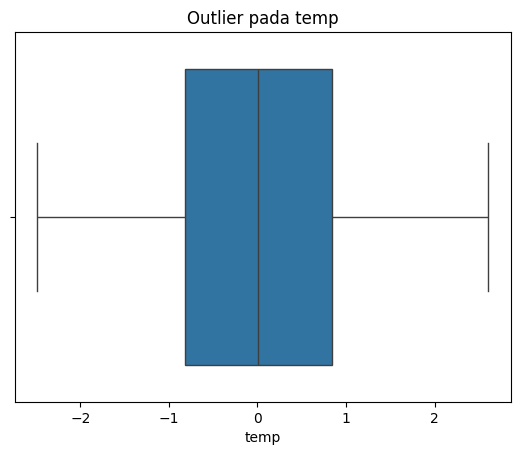

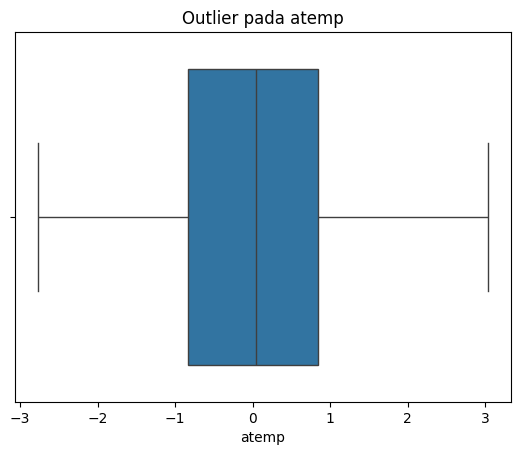

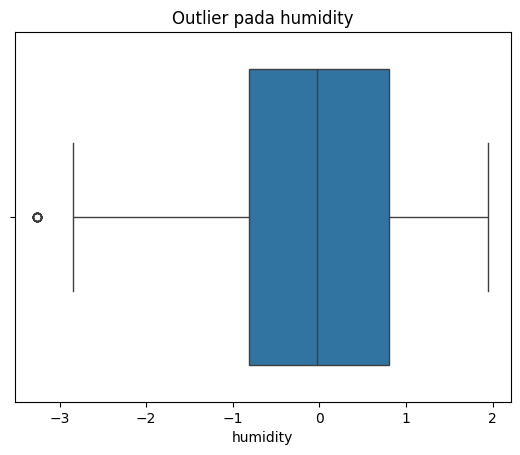

In [78]:
# Outlier

import matplotlib.pyplot as plt

# Visualisasi outlier
for feature in numerical_features:
    sns.boxplot(x=data_pre[feature])
    plt.title(f"Outlier pada {feature}")
    plt.show()

# Menggunakan IQR untuk menangani outlier
for feature in numerical_features:
    Q1 = data_pre[feature].quantile(0.25)
    Q3 = data_pre[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    data_pre = data_pre[(data_pre[feature] >= lower_bound) & (data_pre[feature] <= upper_bound)]

In [79]:
# Memisahkan fitur dan target
X = data_pre.drop(columns=['count'])
y = data_pre['count']

In [80]:
data_pre.columns

Index(['humidity', 'holiday', 'atemp', 'temp', 'hour', 'count', 'year',
       'month', 'day', 'weekday', 'season_2', 'season_3', 'season_4',
       'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

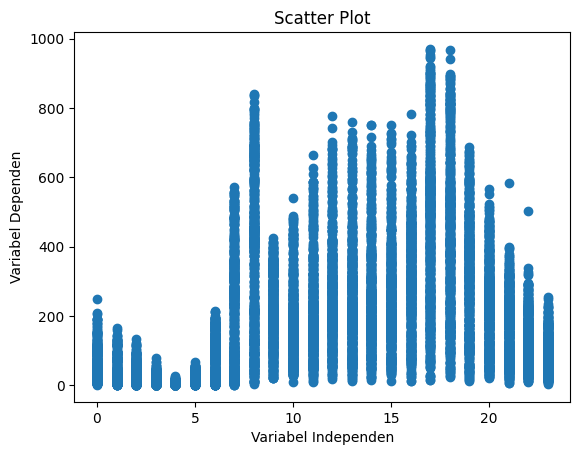

In [81]:
plt.scatter(data_pre['hour'], data_pre['count'])
plt.xlabel('Variabel Independen')
plt.ylabel('Variabel Dependen')
plt.title('Scatter Plot')
plt.show()

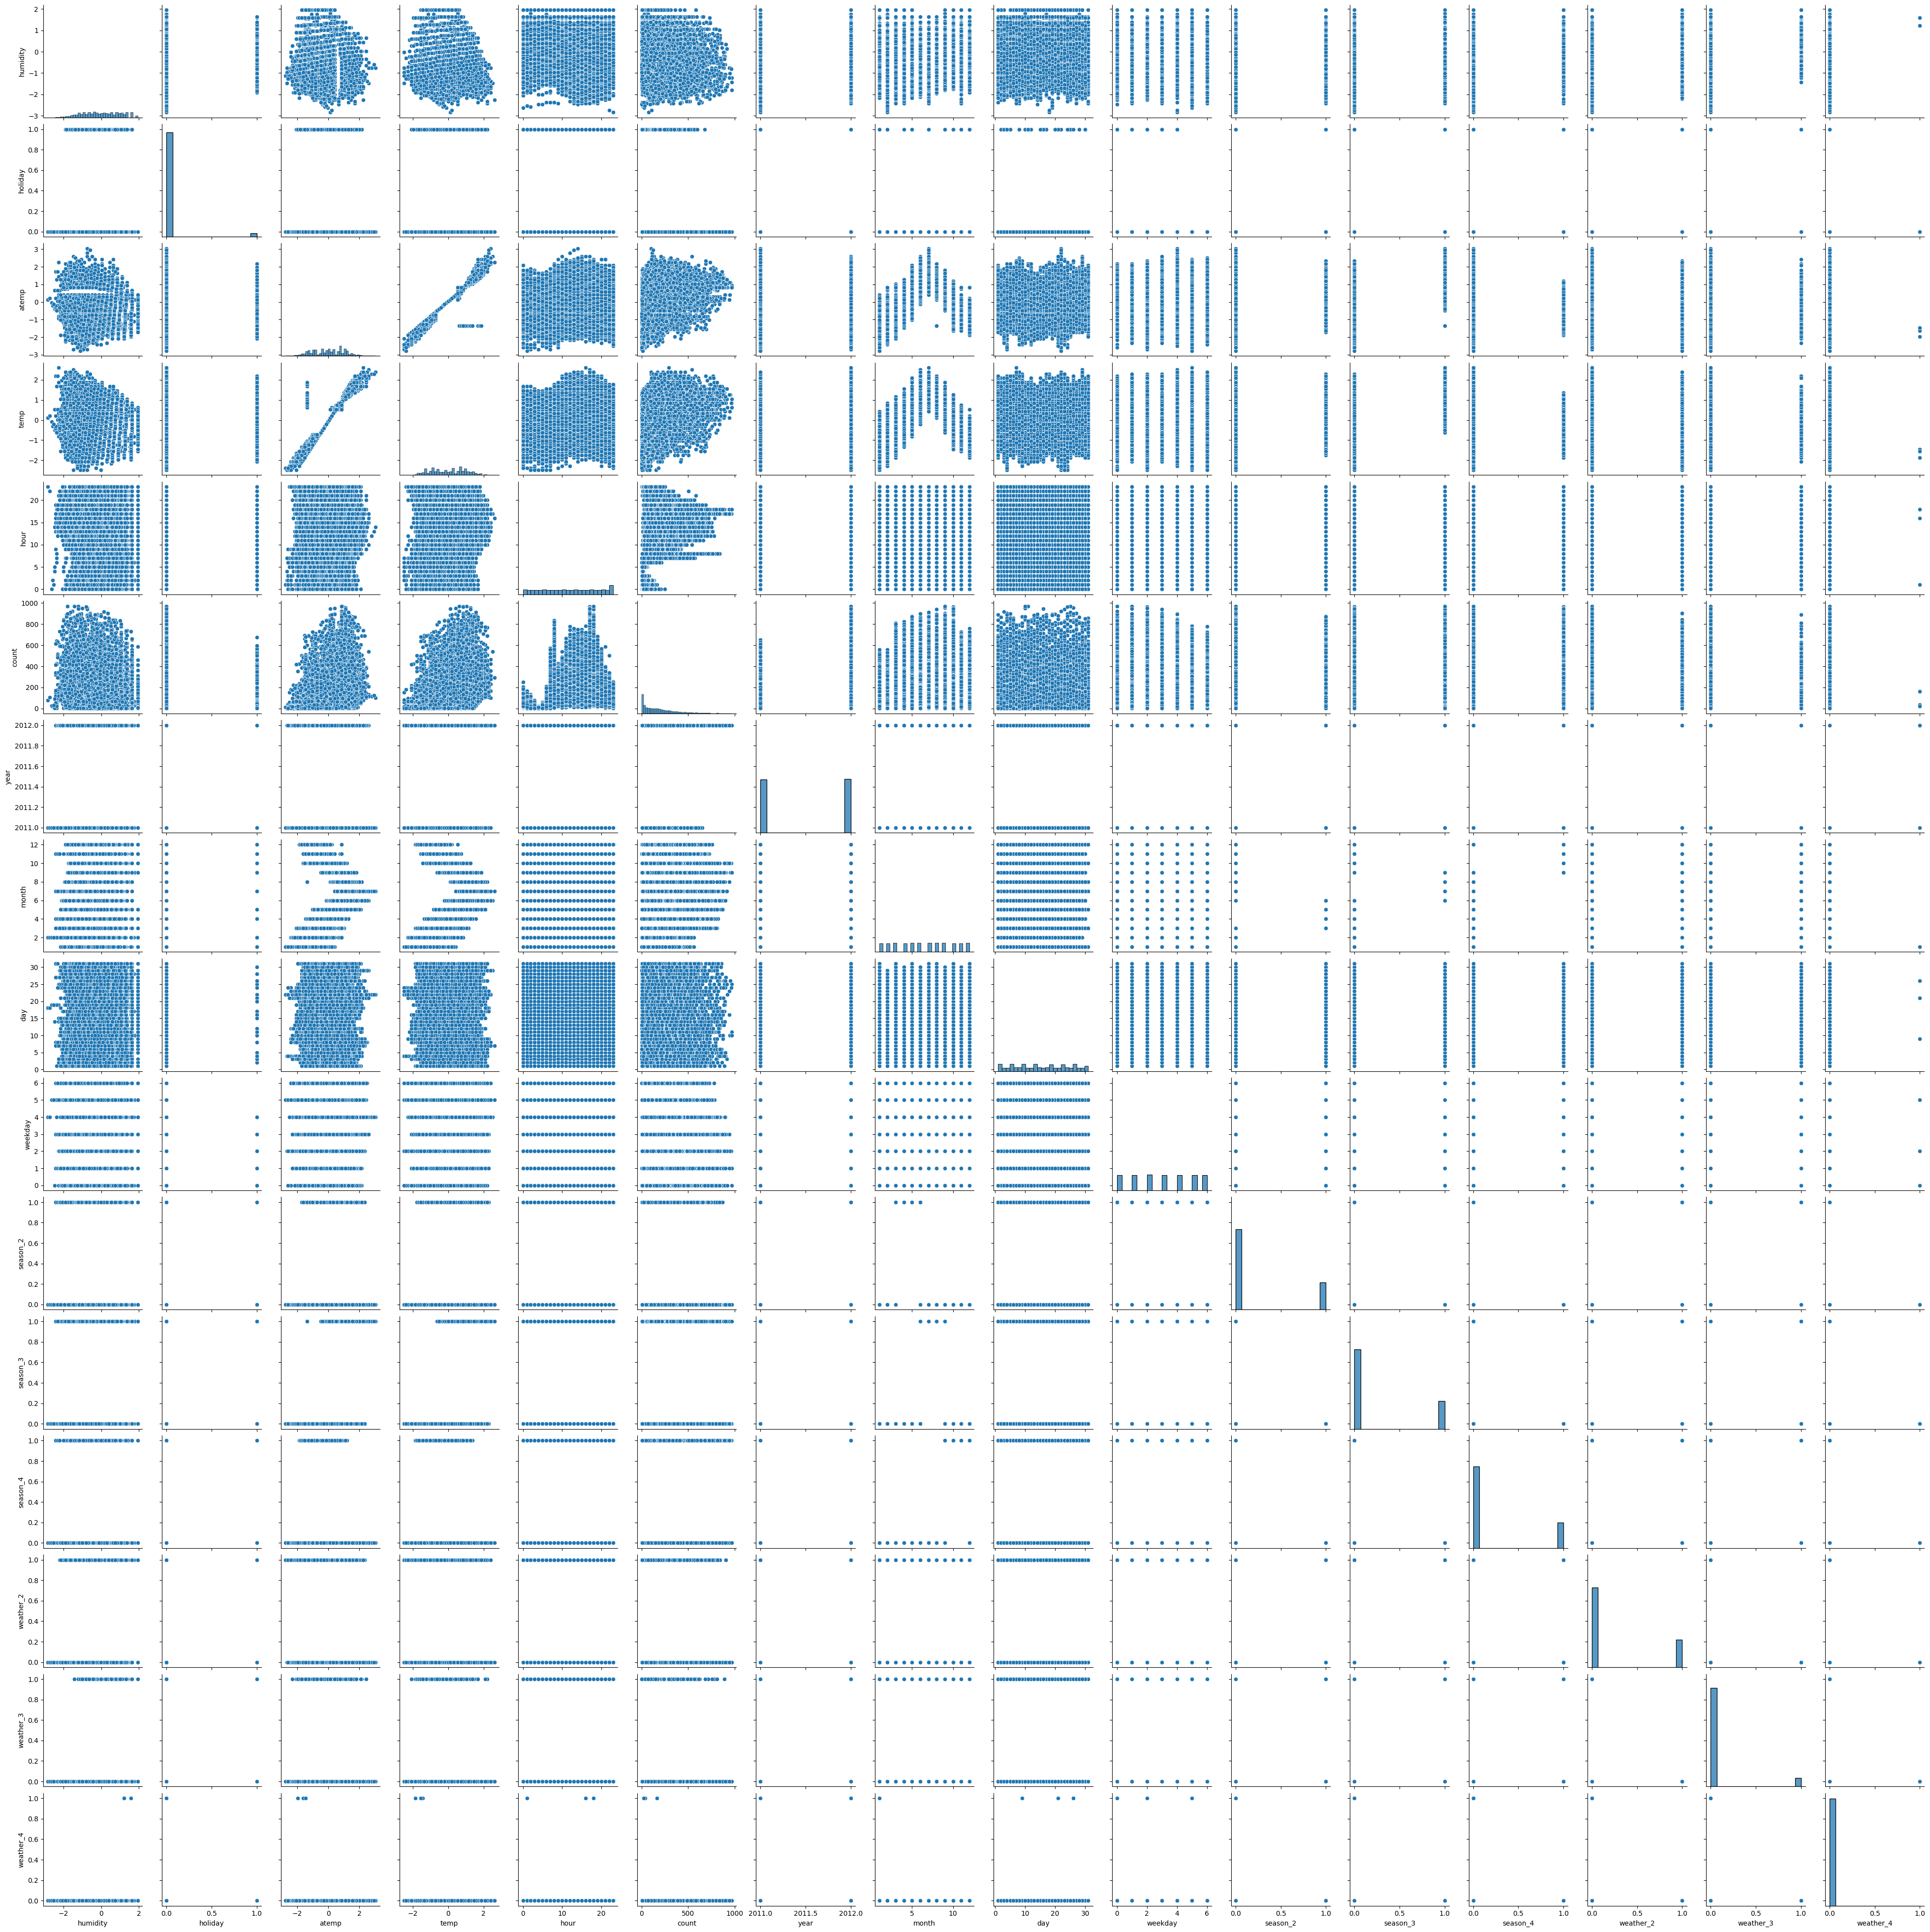

In [82]:
# feature_columns = data_pre.drop('count',axis=1).columns

sns.pairplot(data_pre)

In [83]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.pipeline import Pipeline

preprocessing_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

# Menerapkan pipeline ke data train dan test
X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

- Modelling

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

a. LinearRegression

In [86]:
# Inisialisasi model Linear Regression
linear_model = LinearRegression()

# Melatih model
linear_model.fit(X_train, y_train)

# Prediksi
y_pred_linear = linear_model.predict(X_test)

# Evaluasi model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.2f}, R2: {r2_linear:.2f}")

Linear Regression MSE: 18372.36, R2: 0.40


b. Random Forest Regression

In [87]:
# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest MSE: 1907.09, R2: 0.94


In [88]:
# Definisikan parameter yang akan dituning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error')

# Melakukan pencarian
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

# Menggunakan model terbaik
best_rf_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluasi model terbaik
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest MSE: {mse_best_rf:.2f}, R2: {r2_best_rf:.2f}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest MSE: 1871.50, R2: 0.94


In [89]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_best_rf)

# Root Mean Squared Error
rmse = mse_best_rf ** 0.5

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 26.78, RMSE: 43.26


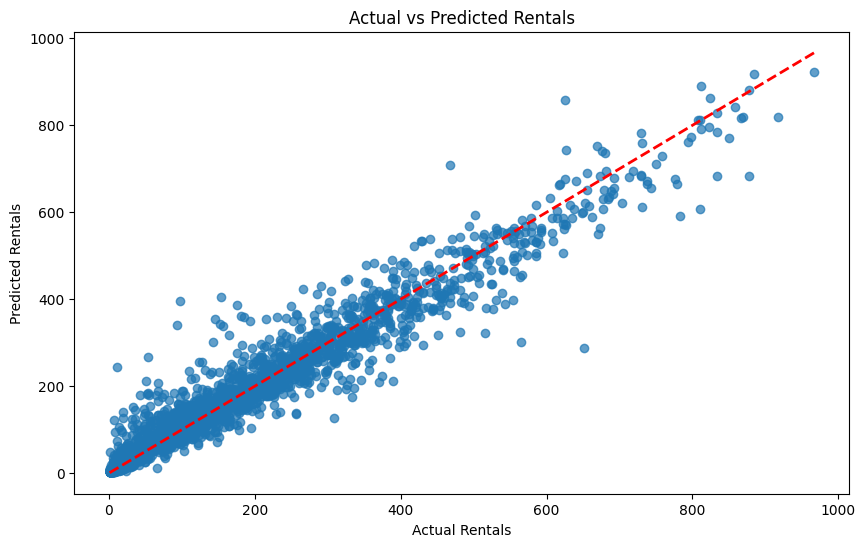

In [90]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Rentals')
plt.show()


In [91]:
sns.residplot(x='Head_size', y='Brain_weight', data=data) 
  
plt.show() 

KeyError: 'Head_size'

---

**6.1 Initialization**
- Initialization function
- Define Feature and Target

**6.2 Data Transformation (Feature Engineering)**

**6.3 Overview**

## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

**7.2 Developing the Model Pipeline**

**7.3 Model Benchmarking (Comparing model base performance)**

**7.4 Tune Model**

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

**7.6 Model Calibration (Classification Only)**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)